# IMPORT LIBRARIES

In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install imagehash

Note: you may need to restart the kernel to use updated packages.


In [5]:
#main
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import os
import glob
import gc
import string
import time
import random
import imutils
from PIL import Image
from tqdm import tqdm
tqdm.pandas()

#models
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from keras.models import load_model, Model
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Visualisation
import matplotlib
import matplotlib.pyplot as plt
import IPython.display as display
import plotly
import plotly.graph_objects as go
import plotly.express as px
import ipywidgets as widgets
from plotly.subplots import make_subplots
from sklearn.manifold import TSNE
from matplotlib.image import imread

# IMPORT DATA

In [46]:
# load the data containing JPEG images
asl_dataset = 'C:/Users/USER/OneDrive - Teesside University/Documents/Msc_Project_Loyal/ASL_data'

# Specify the output folder path for resized images 
asl_folder = 'C:/path/to/output/folder'

# Iterate through all files and subfiles in the asl_dataset
for dirname, _, filenames in os.walk(asl_dataset):
    for filename in filenames:
        # Check for file type either JPG or JPEG image
        if filename.lower().endswith(('.jpg', '.jpeg')):
            # Construct the full path to the image file
            image_path = os.path.join(dirname, filename)
            
            try:
                # Open and process the image using PIL from the image_path
                img = Image.open(image_path)
                
                # Resizing image
                target_size = (256, 256)  # Specify the target size for resizing
                asl_resized = img.resize(target_size) # Saving resized images
                
                # Save the resized image to the asl_folder
                output_filename = f"resized_{filename}"
                # Construct output path for the resized images
                output_path = os.path.join(asl_folder, output_filename)
                asl_resized.save(output_path)
                
                print(f"Processed image saved: {output_path}")
                
            except Exception as e:
                print(f"Error processing image: {image_path} - {e}")


Processed image saved: C:/path/to/output/folder\resized_hand1_0_bot_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_0_bot_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_0_bot_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_0_bot_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_0_bot_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_0_dif_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_0_dif_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_0_dif_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_0_dif_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_0_dif_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_0_left_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/f

Processed image saved: C:/path/to/output/folder\resized_hand2_1_right_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_1_right_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_1_top_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_1_top_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_1_top_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_1_top_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_1_top_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand3_1_dif_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand3_1_dif_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand3_1_dif_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand3_1_dif_seg_4_cropped.jpeg
Processed image saved: C:/path/to/outpu

Processed image saved: C:/path/to/output/folder\resized_hand1_3_left_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_3_right_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_3_right_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_3_right_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_3_right_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_3_right_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_3_top_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_3_top_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_3_top_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_3_top_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_3_top_seg_5_cropped.jpeg
Processed image saved: C:/path/t

Processed image saved: C:/path/to/output/folder\resized_hand5_4_bot_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_4_bot_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_4_bot_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_4_bot_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_4_dif_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_4_dif_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_4_dif_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_4_dif_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_4_dif_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_5_bot_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_5_bot_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/fo

Processed image saved: C:/path/to/output/folder\resized_hand2_6_right_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_6_right_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_6_right_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_6_right_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_6_top_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_6_top_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_6_top_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_6_top_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_6_top_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand3_6_dif_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand3_6_dif_seg_2_cropped.jpeg
Processed image saved: C:/path/to/o

Processed image saved: C:/path/to/output/folder\resized_hand1_8_top_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_8_bot_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_8_bot_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_8_bot_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_8_bot_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_8_bot_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_8_dif_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_8_dif_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_8_dif_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_8_dif_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_8_dif_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/fo

Processed image saved: C:/path/to/output/folder\resized_hand1_a_dif_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_a_dif_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_a_dif_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_a_dif_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_a_left_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_a_left_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_a_left_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_a_left_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_a_left_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_a_right_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_a_right_seg_2_cropped.jpeg
Processed image saved: C:/path/to/

Processed image saved: C:/path/to/output/folder\resized_hand4_b_bot_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_b_bot_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_b_bot_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_b_bot_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_b_bot_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_b_bot_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_b_dif_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_b_dif_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_b_dif_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_b_dif_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_b_dif_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/fo

Processed image saved: C:/path/to/output/folder\resized_hand2_d_right_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_d_right_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_d_right_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_d_top_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_d_top_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_d_top_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_d_top_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_d_top_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand3_d_dif_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand3_d_dif_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand3_d_dif_seg_3_cropped.jpeg
Processed image saved: C:/path/to/out

Processed image saved: C:/path/to/output/folder\resized_hand1_f_left_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_f_left_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_f_right_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_f_right_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_f_right_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_f_right_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_f_right_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_f_top_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_f_top_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_f_top_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_f_top_seg_4_cropped.jpeg
Processed image saved: C:/path/

Processed image saved: C:/path/to/output/folder\resized_hand5_g_dif_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_g_dif_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_g_dif_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_g_dif_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_g_dif_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_h_bot_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_h_bot_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_h_bot_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_h_bot_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_h_bot_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_h_dif_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/fo

Processed image saved: C:/path/to/output/folder\resized_hand2_i_top_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_i_top_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_i_top_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_i_top_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_i_top_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand3_i_dif_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand3_i_dif_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand3_i_dif_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand3_i_dif_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand3_i_dif_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand4_i_bot_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/fo

Processed image saved: C:/path/to/output/folder\resized_hand1_k_right_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_k_right_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_k_right_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_k_right_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_k_right_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_k_top_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_k_top_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_k_top_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_k_top_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_k_top_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_k_bot_seg_1_cropped.jpeg
Processed image saved: C:/path/to

Processed image saved: C:/path/to/output/folder\resized_hand3_l_dif_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand3_l_dif_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand4_l_bot_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand4_l_bot_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand4_l_bot_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand4_l_bot_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand4_l_bot_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_l_bot_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_l_bot_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_l_bot_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_l_bot_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/fo

Processed image saved: C:/path/to/output/folder\resized_hand1_n_top_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_n_bot_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_n_bot_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_n_bot_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_n_bot_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_n_bot_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_n_dif_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_n_dif_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_n_dif_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_n_dif_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_n_dif_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/fo

Processed image saved: C:/path/to/output/folder\resized_hand5_o_bot_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_o_bot_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_o_bot_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_o_bot_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_o_bot_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_o_dif_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_o_dif_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_o_dif_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_o_dif_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_o_dif_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_p_bot_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/fo

Processed image saved: C:/path/to/output/folder\resized_hand2_q_left_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_q_left_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_q_left_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_q_right_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_q_right_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_q_right_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_q_right_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_q_right_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_q_top_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_q_top_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_q_top_seg_3_cropped.jpeg
Processed image saved: C:/path

Processed image saved: C:/path/to/output/folder\resized_hand1_s_top_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_s_top_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_s_top_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_s_top_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_s_top_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_s_bot_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_s_bot_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_s_bot_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_s_bot_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_s_bot_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_s_dif_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/fo

Processed image saved: C:/path/to/output/folder\resized_hand1_u_dif_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_u_dif_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_u_dif_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_u_dif_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_u_left_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_u_left_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_u_left_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_u_left_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_u_left_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_u_right_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_u_right_seg_2_cropped.jpeg
Processed image saved: C:/path/to/

Processed image saved: C:/path/to/output/folder\resized_hand5_v_bot_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_v_bot_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_v_dif_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_v_dif_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_v_dif_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_v_dif_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand5_v_dif_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_w_bot_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_w_bot_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_w_bot_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_w_bot_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/fo

Processed image saved: C:/path/to/output/folder\resized_hand2_x_left_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_x_left_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_x_left_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_x_left_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_x_right_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_x_right_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_x_right_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_x_right_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_x_right_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_x_top_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand2_x_top_seg_2_cropped.jpeg
Processed image saved: C:/pat

Processed image saved: C:/path/to/output/folder\resized_hand1_z_dif_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_z_dif_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_z_dif_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_z_dif_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_z_left_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_z_left_seg_2_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_z_left_seg_3_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_z_left_seg_4_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_z_left_seg_5_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_z_right_seg_1_cropped.jpeg
Processed image saved: C:/path/to/output/folder\resized_hand1_z_right_seg_2_cropped.jpeg
Processed image saved: C:/path/to/

# EXPLORATORY DATA ANALYSIS

# VISUALIZE DATASET

C:\Users\USER\AppData\Local\Temp\ipykernel_348\491393903.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


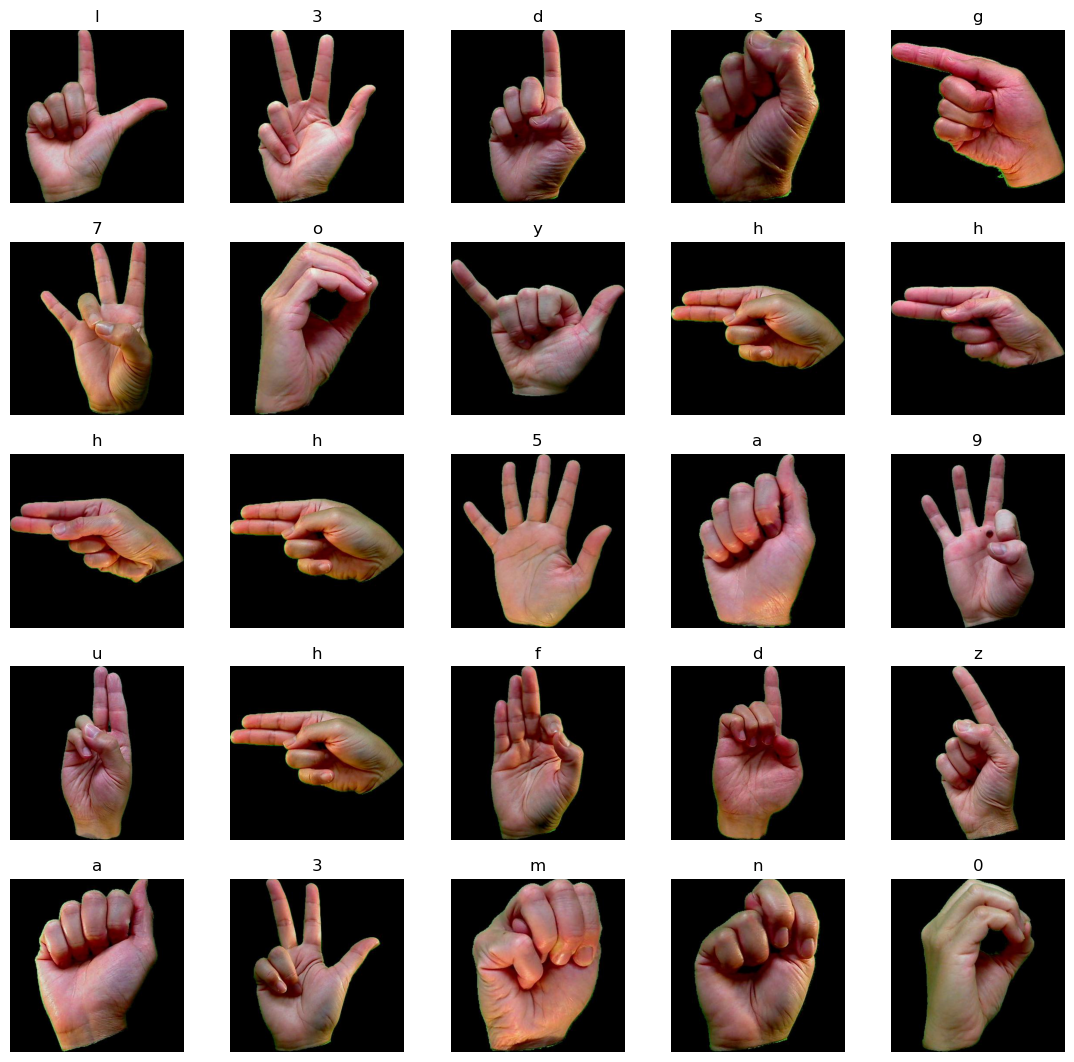

In [48]:
#visualise random signs 
plt.figure(figsize=(11,11)) # Initialise new matplot with sizes
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    plt.axis('off')
    
    # Create random selection
    randval = random.choice(list(categories.values()))
    
    # Read through random choosen image
    randimg = imread(data_path + '/' + randval + '/' + random.choice(sorted(os.listdir(data_path + '/' + randval + '/'))))
    
    # Set title of subplot to selected sign label
    plt.imshow(randimg)
    plt.title(randval)

Text(0.5, 1.0, 'Count of Images by for each Sign')

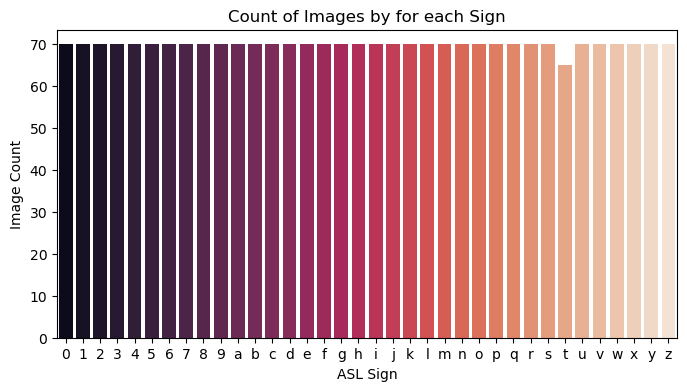

In [50]:
# visualize distribution/count of images by sign in each dataset
sign_freq = df['label'].value_counts().reset_index().sort_values('label') # Calculate the frequency in each sign label
plt.figure(figsize=(8, 4))
sns.barplot(sign_freq, x='label', y='count', palette='rocket') 
plt.xlabel('ASL Sign')
plt.ylabel('Image Count')
plt.title('Count of Images by for each Sign')

Mean Pixel Value: 26.481272916666665
Standard Deviation of Pixel Value: 48.43394190506299


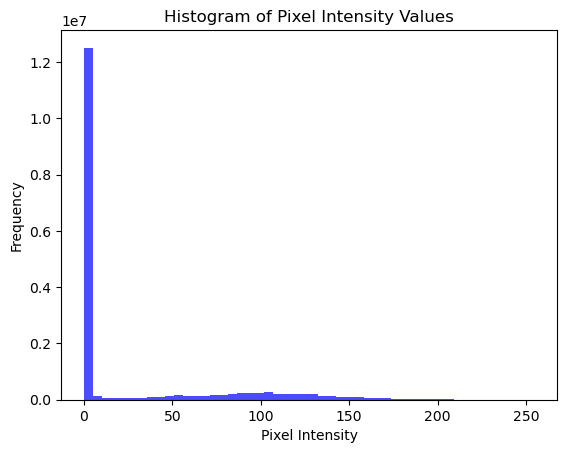

In [67]:
#Image statistics
# Calculate mean and standard deviation of pixel values
pixel_values = []
for img_file in image_files:
    image_path = os.path.join(dirname, filename)
    pixels = np.array(img).flatten()
    pixel_values.extend(pixels)

mean_pixel_value = np.mean(pixel_values)
std_pixel_value = np.std(pixel_values)
print(f"Mean Pixel Value: {mean_pixel_value}")
print(f"Standard Deviation of Pixel Value: {std_pixel_value}")

# Plot histogram of pixel intensity values
plt.hist(pixel_values, bins=50, color='b', alpha=0.7)
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Pixel Intensity Values')
plt.show()

In [68]:
# Create an interactive slider for zooming
zoom_slider = widgets.FloatSlider(value=1.0, min=0.1, max=3.0, step=0.1, description='Zoom Level')

def plot_image(zoom_level):
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.title('Interactive Image')
    plt.axis('off')
    # Calculate new image dimensions based on zoom level
    new_width = img.shape[1] * zoom_level
    new_height = img.shape[0] * zoom_level
    plt.xlim([0, new_width])
    plt.ylim([new_height, 0])  # Invert y-axis for correct orientation
    plt.show()

# Create interactive widget
widgets.interactive(plot_image, zoom_level=zoom_slider)

interactive(children=(FloatSlider(value=1.0, description='Zoom Level', max=3.0, min=0.1), Output()), _dom_clas…

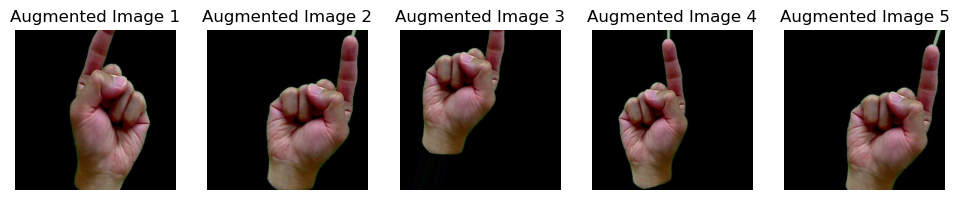

In [74]:
# Define data augmentation parameters to improve robustness
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2,
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

# Augment an image with existing data
img_array = image.img_to_array(img)
img_array = img_array.reshape((1,) + img_array.shape)

# Generate augmented images
augmented_images = []
for batch in datagen.flow(img_array, batch_size=1):
    augmented_images.append(batch[0].astype('uint8'))
    if len(augmented_images) >= 5:
        break

# Plot augmented images
plt.figure(figsize=(12, 6))
for i, aug_img in enumerate(augmented_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(aug_img)
    plt.title(f'Augmented Image {i+1}')
    plt.axis('off')
plt.show()

In [64]:
#Feature extraction
# Load VGG16 model pretrained on ImageNet
model = VGG16(weights='imagenet', include_top=False)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Extract features from the image using the VGG16 model
features = model.predict(img_array)
print(features.shape)  # Output shape of extracted features

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
(1, 12, 12, 512)
